# Edible and Poisonous Mushrooms Dataset

 The given dataset is about the different species of Mushroom 
and based on the different properties of mushroom which is given
as categorical features. We will further explore the data in the notebook.
we have to predict or classify whether a particular species of mushroom is 
ediable or poisonous. so it clear that it is classification task and we are
going to use LogisticRegression Classifier and Random Forests Classifier 
algorithms for this problem.


* In mushroom dataset total 22 features are available and all of them are categorical.

### Independent Features are:
* 1. Cap-Shape- bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* 2. Cap-surface- fibrous=f,grooves=g,scaly=y,smooth=s
* 3. Cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* 4. Bruises: bruises=t,no=f
* 5. Odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* 6. Gill-attachment: attached=a,descending=d,free=f,notched=n
* 7. Gill-spacing:close=c,crowded=w,distant=d
* 8. Gill-size:broad=b,narrow=n
* 9. Gill-color: broad=b,narrow=n
* 10. Stalk-shape: enlarging=e,tapering=t
* 11.Stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* 12.Stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s


* 13.Stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* 14.Stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* 15.Stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* 16.Veil-type: partial=p,universal=u
* 17. Veil-color:brown=n,orange=o,white=w,yellow=y
* 18.Ring-number: none=n,one=o,two=t
* 19.Ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* 20.Spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* 21.Population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* 22.Habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter("ignore")

In [52]:
df = pd.read_csv("agaricus-lepiota.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [62]:
df.shape

(8124, 23)

In [58]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

###### No null values are present in dataset.

In [50]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


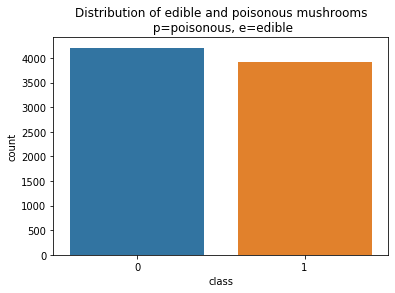

In [49]:
#plt.figure(figsize=(5,5))
sns.countplot(df['class'])
plt.title("Distribution of edible and poisonous mushrooms\n p=poisonous, e=edible")
plt.show()

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#### No Missing value found
#### No imbalanced dataset

In [8]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
# Exploratory Data Analysis

In [10]:
cat_feature=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

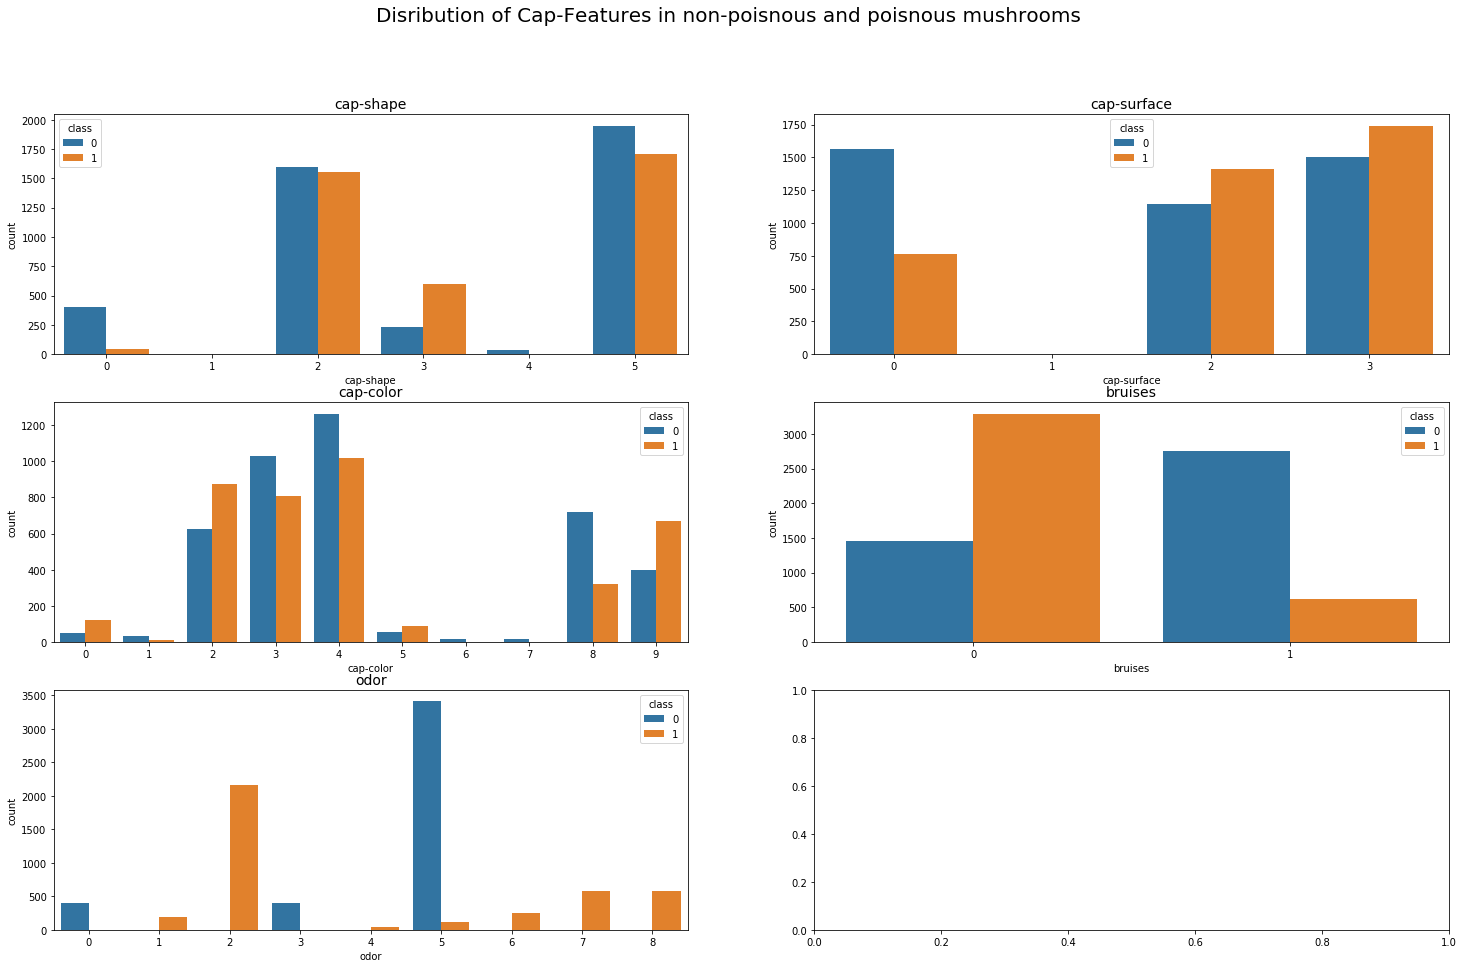

In [45]:
fig, ax=plt.subplots(3, 2, figsize=(25,15))
for i in range(5):
    sns.countplot(cat_feature[i], hue='class', data=df, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(cat_feature[i], fontsize=14)
    
fig.suptitle("Disribution of Cap-Features in non-poisnous and poisnous mushrooms", fontsize=20)
plt.show()

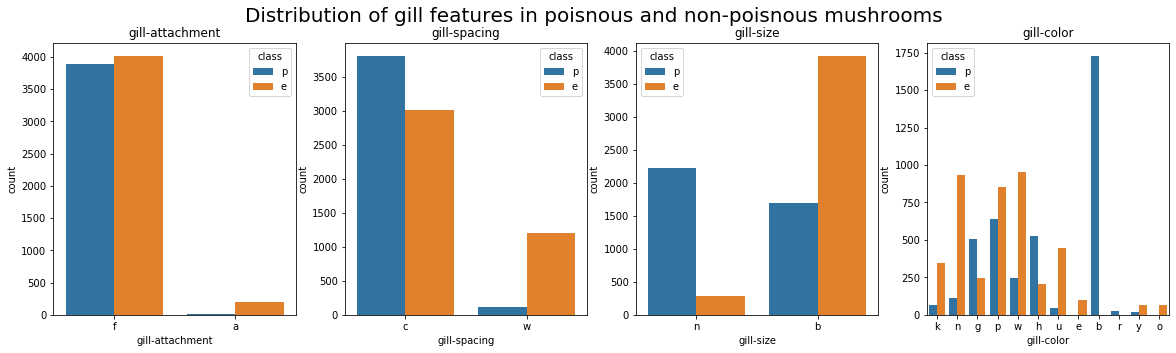

In [12]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.countplot('gill-attachment', hue='class', data=df, ax=ax[0])
ax[0].set_title('gill-attachment')

sns.countplot('gill-spacing', hue='class', data=df, ax=ax[1])
ax[1].set_title('gill-spacing')

sns.countplot('gill-size',hue='class', data=df, ax=ax[2])
ax[2].set_title('gill-size')

sns.countplot('gill-color',hue='class', data=df, ax=ax[3])
ax[3].set_title('gill-color')
fig.suptitle("Distribution of gill features in poisnous and non-poisnous mushrooms", fontsize=20)

plt.show()

In [13]:
features=['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color']

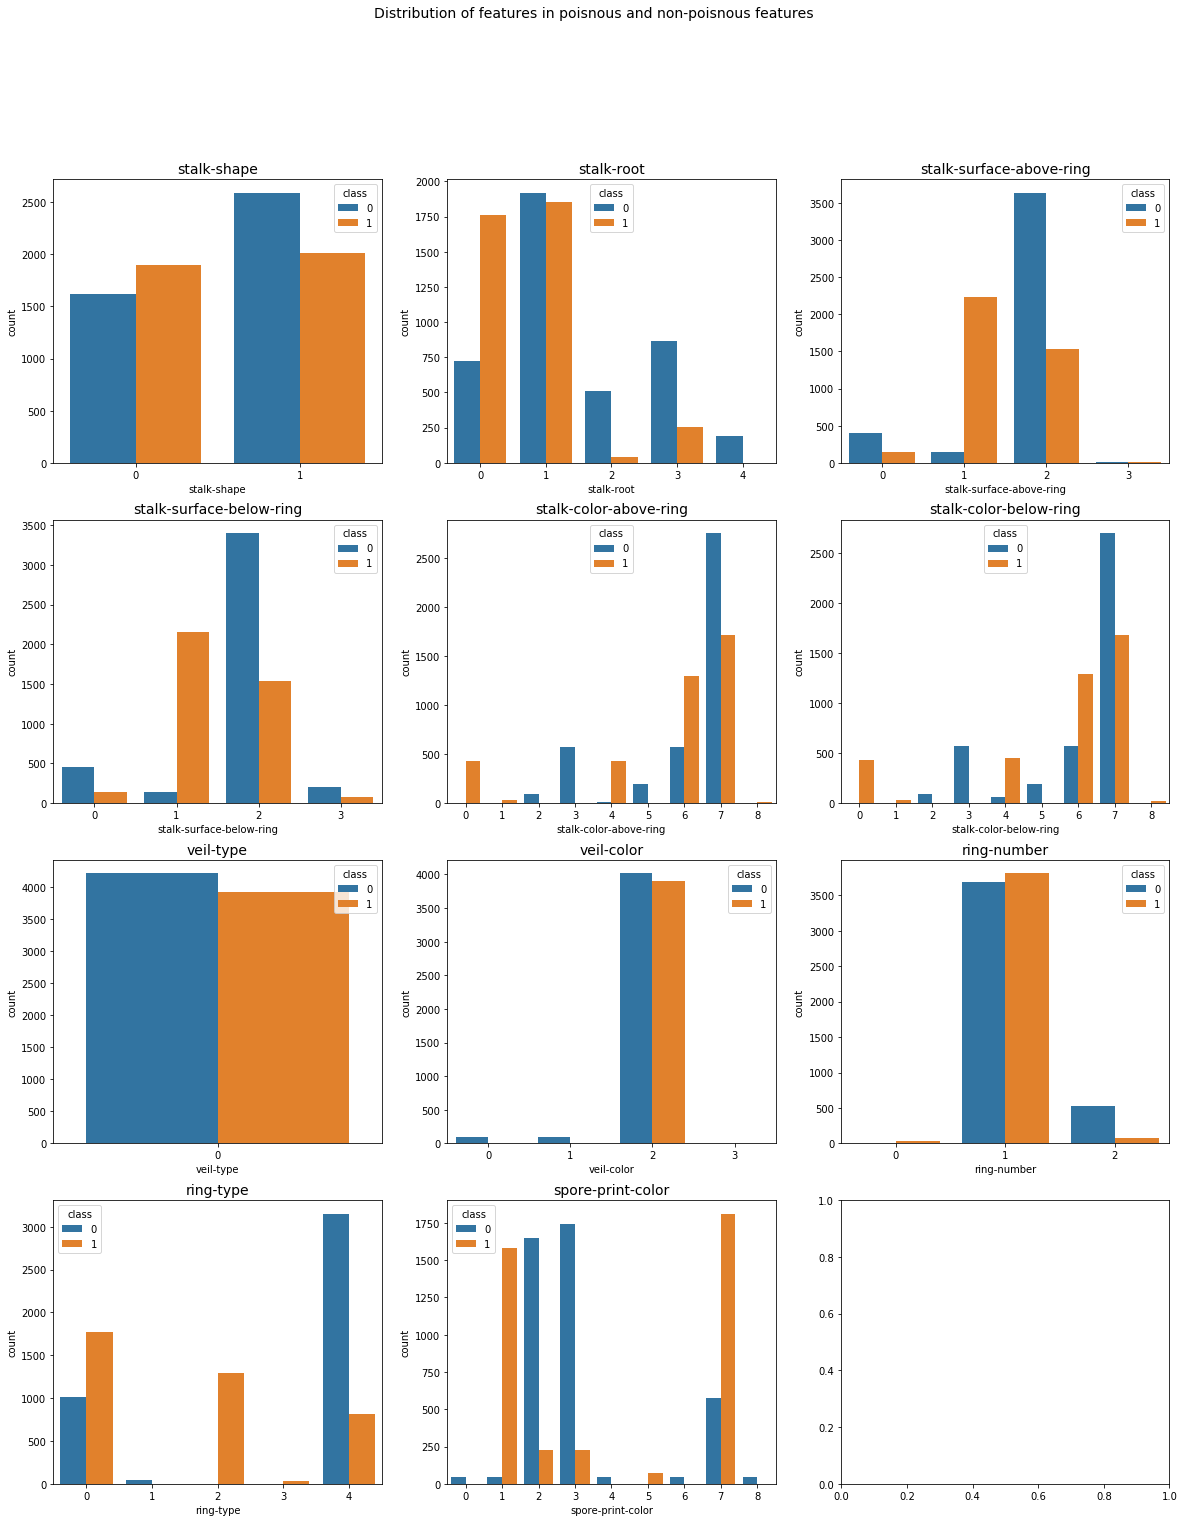

In [42]:
fig, ax=plt.subplots(4,3, figsize=(20,24))
for i in range(11):
    sns.countplot(features[i], hue='class',data=df, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(features[i], fontsize=14)
plt.suptitle("Distribution of features in poisnous and non-poisnous features", fontsize=14)
plt.show()

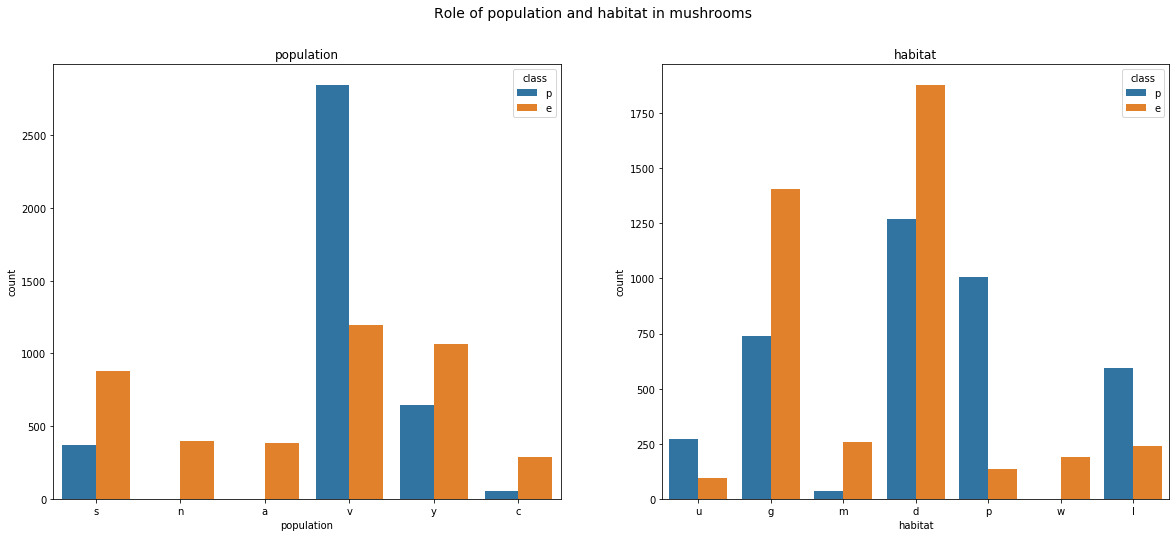

In [15]:
fig, ax=plt.subplots(1,2, figsize=(20,8))

sns.countplot('population', hue='class',data=df, ax=ax[0])
ax[0].set_title('population')

sns.countplot('habitat', hue='class', data=df, ax=ax[1])
ax[1].set_title('habitat')

plt.suptitle("Role of population and habitat in mushrooms", fontsize=14)
plt.show()

In [59]:
columns = df.columns.values
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [63]:
X = df.drop(['class'], axis=1)
y = df['class']

In [70]:
parameters={'min_samples_leaf':[20,25]}
forest=RandomForestClassifier(max_depth=15, n_estimators=15)
grid=GridSearchCV(forest, parameters, cv=3, n_jobs=-1, verbose=2, scoring=make_scorer(roc_auc_score))

In [71]:
grid.fit(X,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   11.4s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   11.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=15,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=15, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [76]:
grid.best_estimator_.feature_importances_


array([0.00227683, 0.0136332 , 0.00759671, 0.0221469 , 0.08286702,
       0.        , 0.065644  , 0.1439994 , 0.13766908, 0.03610854,
       0.04497783, 0.10048755, 0.01670193, 0.00915978, 0.02206815,
       0.        , 0.00139807, 0.01025669, 0.08195451, 0.08265801,
       0.09486769, 0.0235281 ])

In [73]:
grid.best_score_

0.818191539254896

In [74]:
grid.best_params_

{'min_samples_leaf': 25}

In [23]:
top_features=10

In [75]:
imp_feature=grid.best_estimator_.feature_importances_
idx=np.argsort(imp_feature)[::-1][0:top_features]
feature_name=df.drop('class', axis=1).columns.values

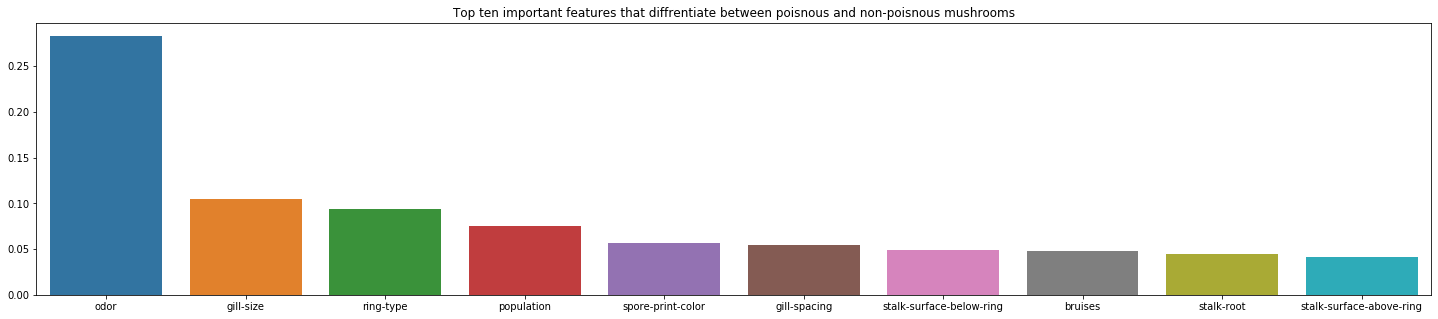

In [25]:
plt.figure(figsize=(25,5))
sns.barplot(x=feature_name[idx], y=imp_feature[idx])
plt.title("Top ten important features that diffrentiate between poisnous and non-poisnous mushrooms")
plt.show()

## Traning and comparing accuracies of various models

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [101]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

## 1. RandomForestClassifier


In [148]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = rfc.score(X_test,y_test)

In [119]:
print("-"*10 + "The performance parameters for Random Forests model" + "-"*10, "\n")
print("The Confusion_matrix is : \n", confusion_matrix(y_test, rfc_pred), "\n\n", "-"*25)
print("The classificaton_report is : \n", classification_report(y_test, rfc_pred), "\n", "-"*25)
print("The accuracy of the model is :", accuracy_score(y_test, rfc_pred))

----------The performance parameters for Random Forests model---------- 

The Confusion_matrix is : 
 [[842   0]
 [  0 783]] 

 -------------------------
The classificaton_report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 -------------------------
The accuracy of the model is : 1.0


##### RandomForestClassifier  is overfitting

## 2.Logistic Regression


In [149]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train, y_train)
# predicting
LR_pred = LR.predict(X_test)
lgc_acc = LR.score(X_test,y_test)

In [104]:
print("-"*10 + "The performance parameters for LR model" + "-"*10, "\n")
print("The Confusion_matrix is : \n\n", confusion_matrix(y_test, LR_pred), "\n\n", "-"*25)
print("The classificaton_report is : \n\n", classification_report(y_test, LR_pred), "\n", "-"*25, "\n")
print("The Accuracy of the Logistic Regression is :",accuracy_score(y_test, LR_pred), '\n\n\n')



----------The performance parameters for LR model---------- 

The Confusion_matrix is : 

 [[814  28]
 [ 51 732]] 

 -------------------------
The classificaton_report is : 

               precision    recall  f1-score   support

           0       0.94      0.97      0.95       842
           1       0.96      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625
 
 ------------------------- 

The Accuracy of the Logistic Regression is : 0.9513846153846154 





## 3. Support Vector Classifier

In [150]:
svc = SVC()
svc.fit(X_train, y_train)
# predicting
svc_pred = svc.predict(X_test)
svc_acc = svc.score(X_test,y_test)

In [111]:
print("-"*10 + "The performance parameters for svc model" + "-"*10, "\n")
print("The Confusion_matrix is : \n\n", confusion_matrix(y_test, svc_pred), "\n\n", "-"*25)
print("The classificaton_report is : \n\n", classification_report(y_test, svc_pred), "\n", "-"*25, "\n")
print("The Accuracy of the Support Vector Classifier is :",accuracy_score(y_test, svc_pred), '\n\n\n')

----------The performance parameters for svc model---------- 

The Confusion_matrix is : 

 [[842   0]
 [ 20 763]] 

 -------------------------
The classificaton_report is : 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       842
           1       1.00      0.97      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625
 
 ------------------------- 

The Accuracy of the Support Vector Classifier is : 0.9876923076923076 





## 4.Gaussian Process Classifier

In [151]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)
gpc_pred = gpc.predict(X_test)
gpc_acc = gpc.score(X_test,y_test)

In [145]:
print("-"*10 + "The performance parameters for svc model" + "-"*10, "\n")
print("The Confusion_matrix is : \n\n", confusion_matrix(y_test, gpc_pred), "\n\n", "-"*25)
print("The classificaton_report is : \n\n", classification_report(y_test, gpc_pred), "\n", "-"*25, "\n")
print("The Accuracy of the Gaussian Process Classifier is :",accuracy_score(y_test, gpc_pred), '\n\n\n')

----------The performance parameters for svc model---------- 

The Confusion_matrix is : 

 [[842   0]
 [  1 782]] 

 -------------------------
The classificaton_report is : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 ------------------------- 

The Accuracy of the Gaussian Process Classifier is : 0.9993846153846154 





### Score comparison of above models

In [155]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'Random Forest', 'Gaussian Process Classifier'],
    
    'Score': [lgc_acc*100,svc_acc*100,rfc_acc*100,gpc_acc*100]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,100.000000
3,Gaussian Process Classifier,99.938462
1,Support Vector Machines,98.769231
0,Logistic Regression,95.138462


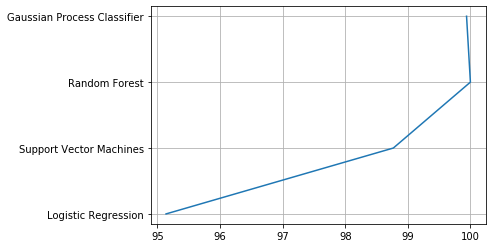

In [156]:
plt.grid()
plt.plot([lgc_acc*100,svc_acc*100,rfc_acc*100,gpc_acc*100],['Logistic Regression', 'Support Vector Machines', 
              'Random Forest', 'Gaussian Process Classifier'])
plt.show()

From the above results we found that all the algorithms working fine for the mashroom dataset. We can consider GPC is the best model for predicting the poisounos and edible mashrooms. Though Random Forest have 100% accuracy but it can be considered as overfitting model.

In [157]:
import joblib
joblib.dump(gpc,"GPC_Mushroom.pkl")

['GPC_Mushroom.pkl']